kadai7

asdfasdf (250,)


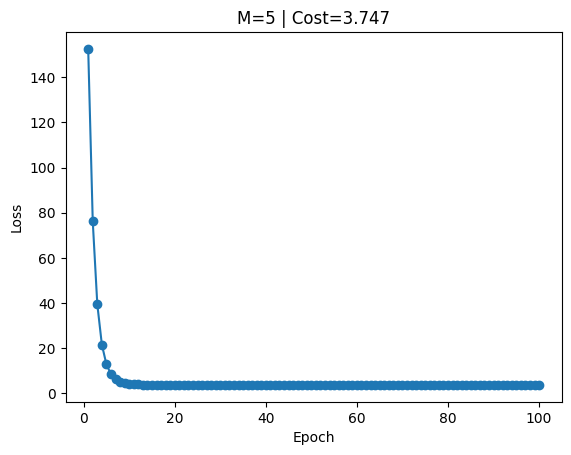

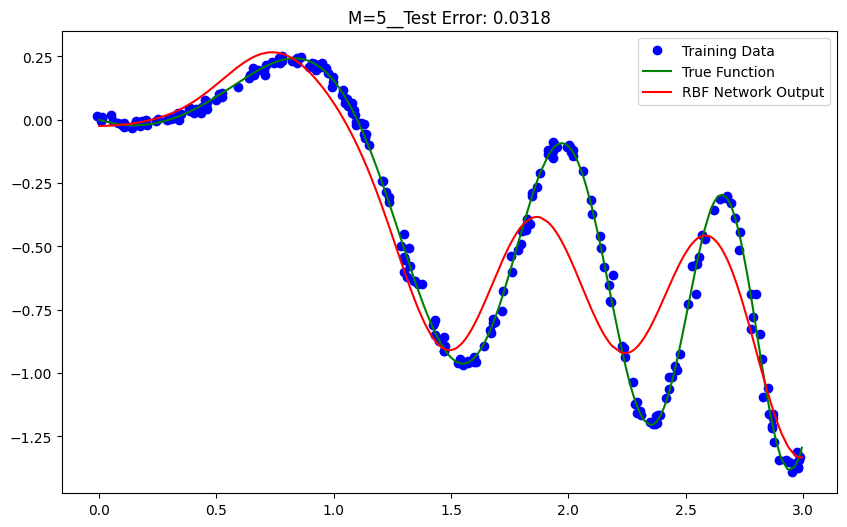

asdfasdf (250,)


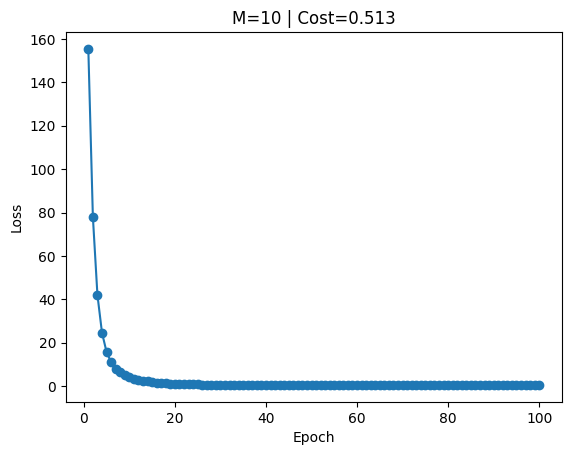

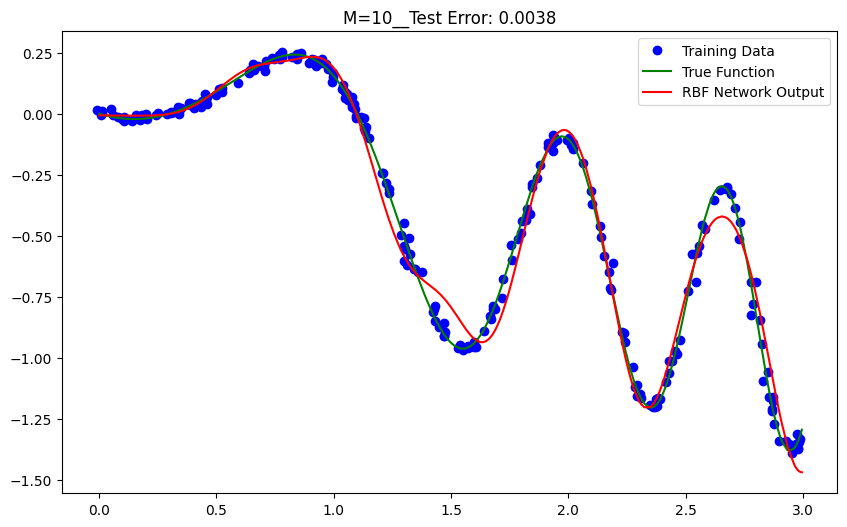

asdfasdf (250,)


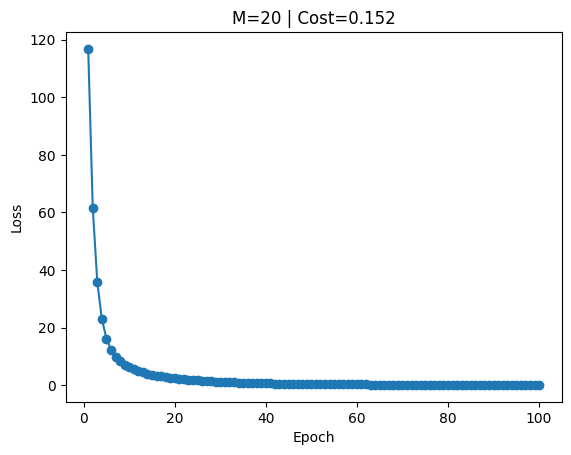

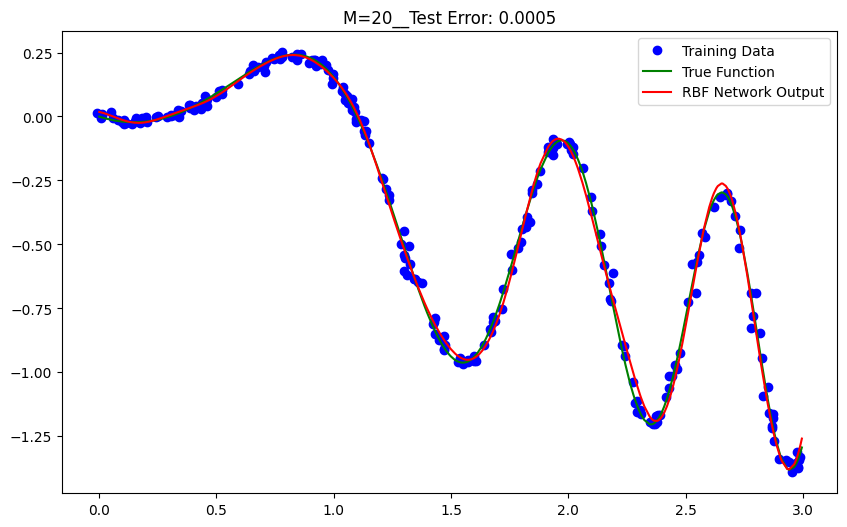

asdfasdf (250,)


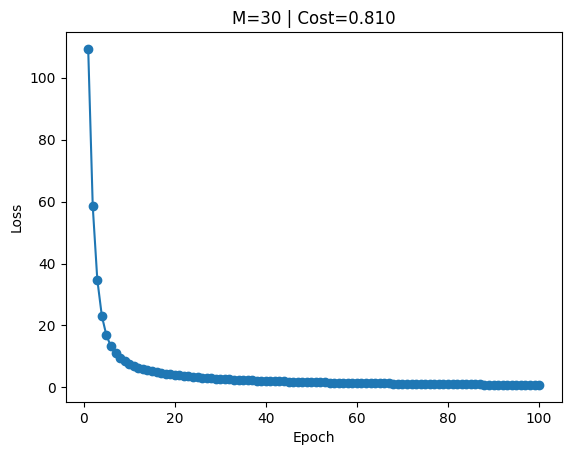

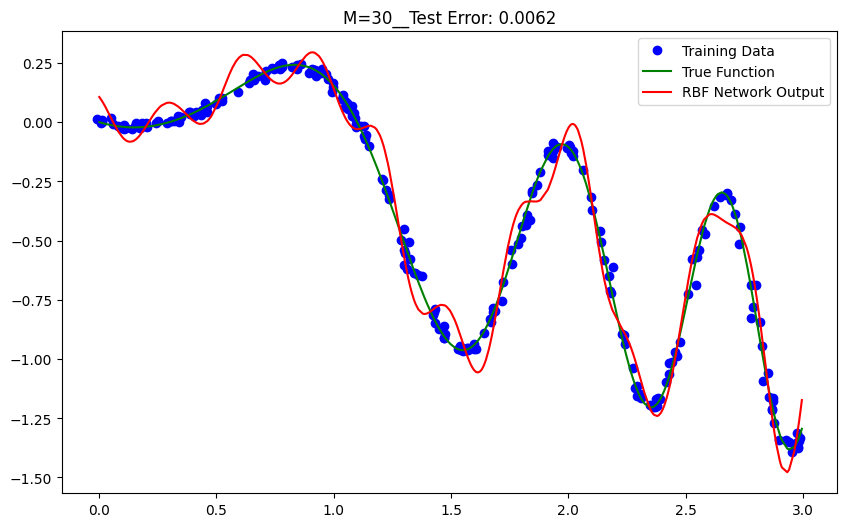

asdfasdf (250,)


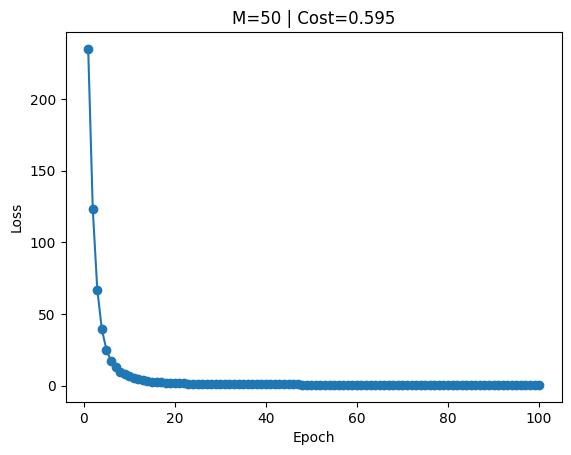

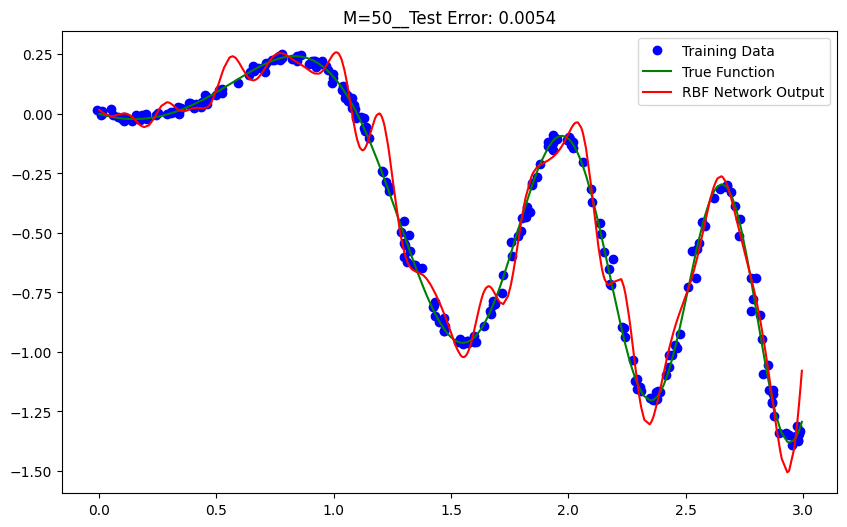

asdfasdf (250,)


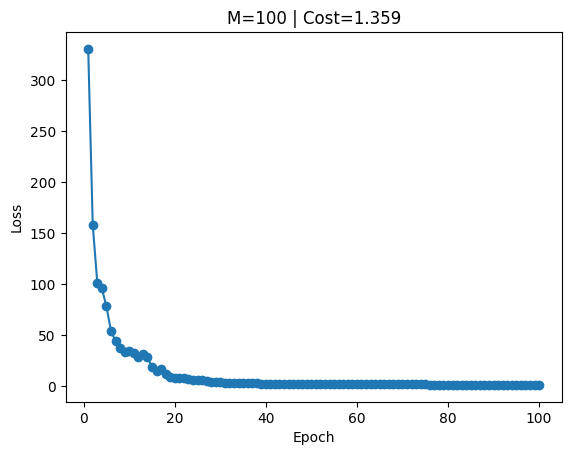

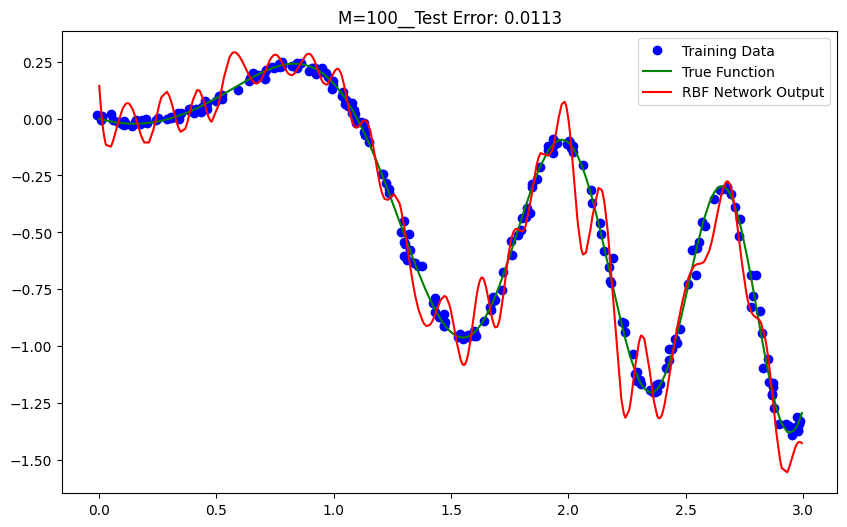

In [1]:
from RBFnetwork import RBF_C

file_path = './kadai2_data/train_01.txt'
folder_name = 'kadai7_data'

learning_rate = 0.01  # learning rate
max_epoch = 100  # max epoch
threshold = 1e-3  # convergence threshold

Mlist = [5, 10, 20, 30, 50, 100]
for m in Mlist:
    rbf = RBF_C(m, learning_rate, max_epoch, threshold)
    rbf.load_data(file_path)
    rbf.train(file_path)
    rbf.params_to_file(folder_name)
    rbf.test_and_display(m,file_path,folder_name)

In [ ]:
# from RBFnetwork import RBF

# # 使用例
# file_path = './kadai2_data/train_01.txt'
# folder_name = 'kadai6_data'
# # M = 10  # RBF基底数
# learning_rate = 0.01  # 学習率
# max_epoch = 1500  # 最大エポック数
# threshold = 1e-3  # 収束判定の閾値

# # rbf = RBFkadai6(M, learning_rate, max_epoch, threshold)
# # rbf.load_data(file_path)
# # rbf.train(file_path)
# # rbf.params_to_file(folder_name)
# # rbf.test_and_display(M,file_path,folder_name)



# Mlist = [5, 10, 20, 30, 50, 100]
# for m in Mlist:
#     rbf = RBF(m, learning_rate, max_epoch, threshold)
#     rbf.load_data(file_path)
#     rbf.train(file_path)
#     rbf.params_to_file(folder_name)
#     rbf.test_and_display(m,file_path,folder_name)

asdfasdf (250,)


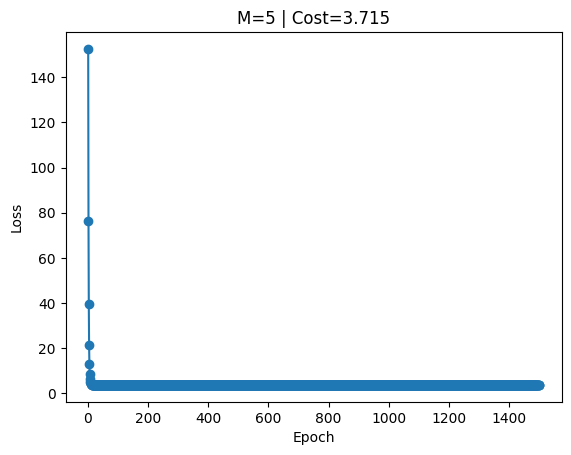

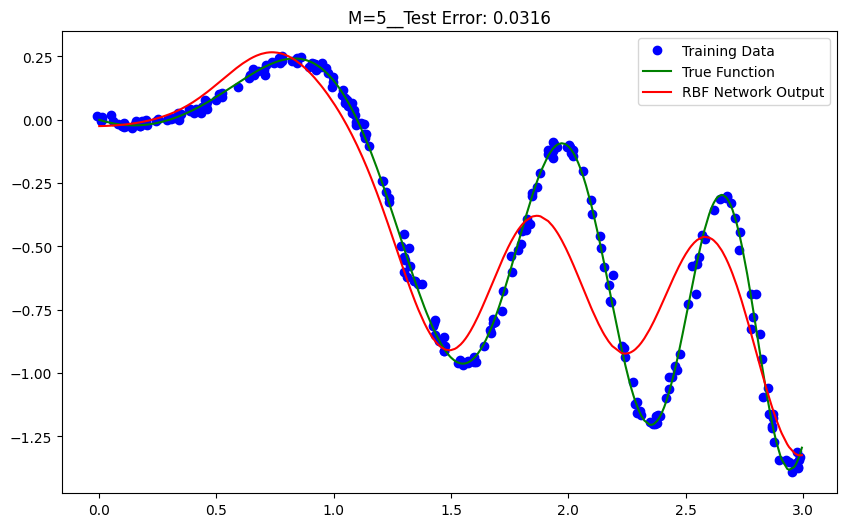

asdfasdf (250,)


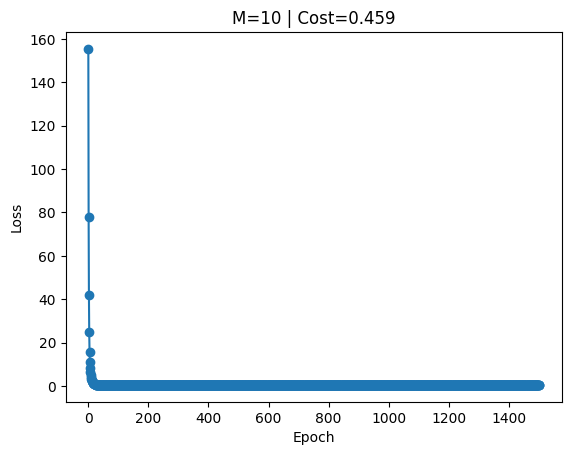

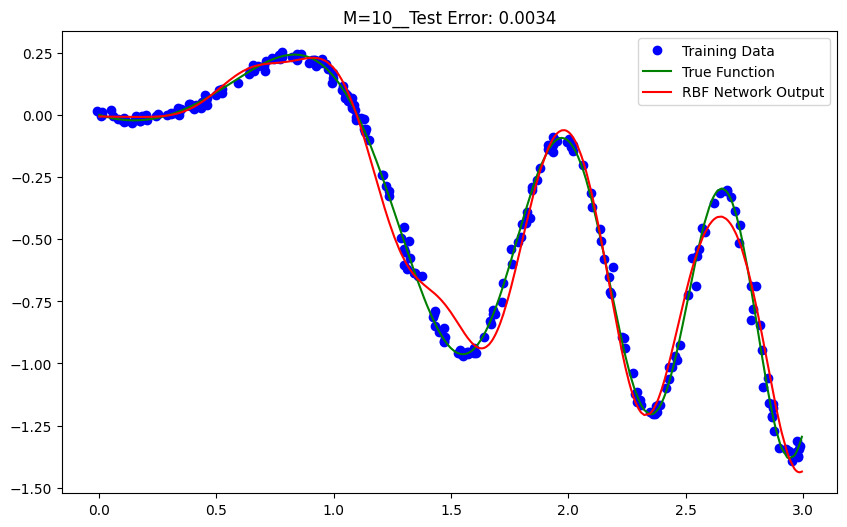

asdfasdf (250,)


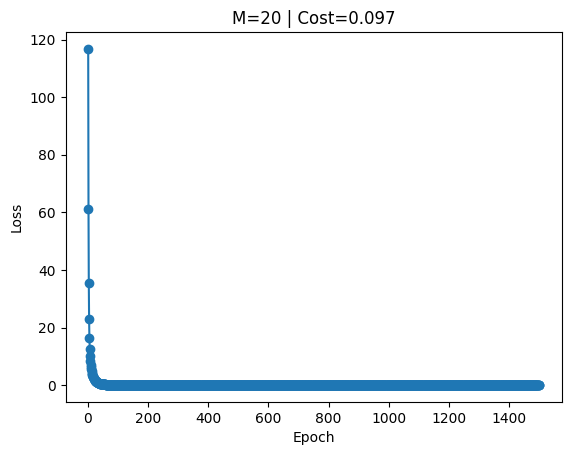

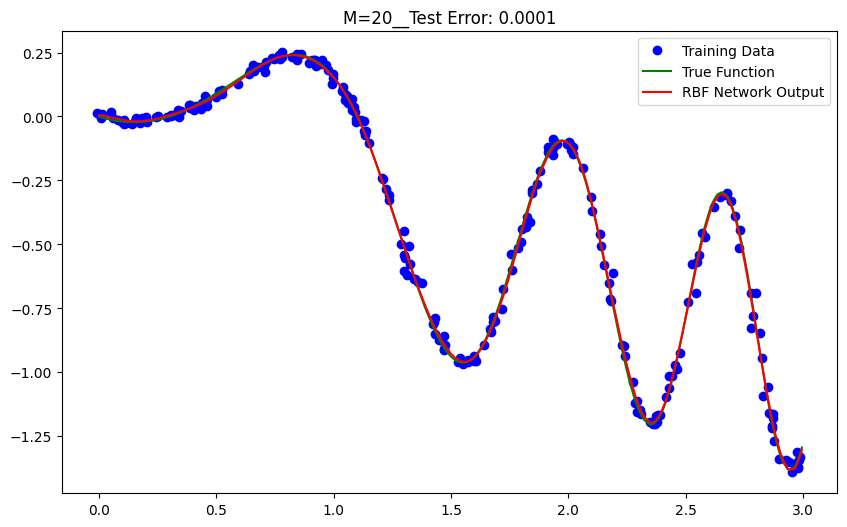

asdfasdf (250,)


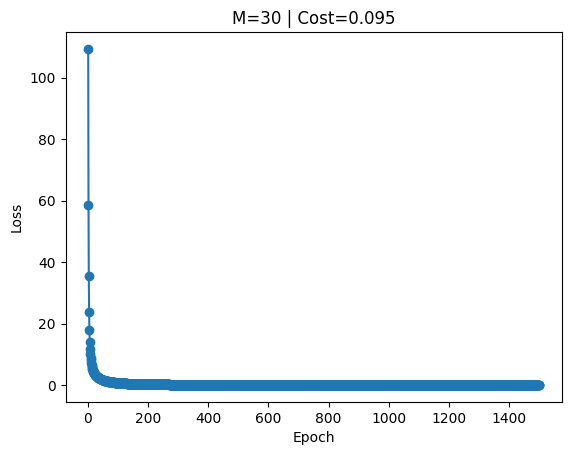

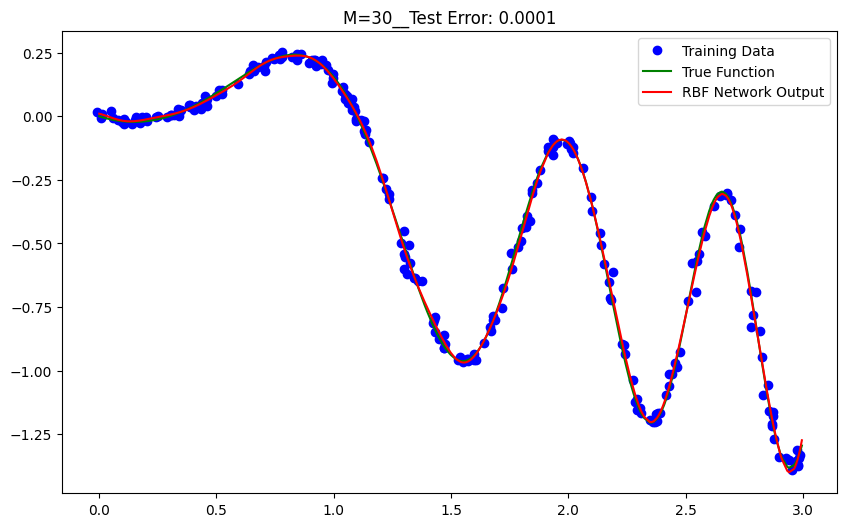

asdfasdf (250,)


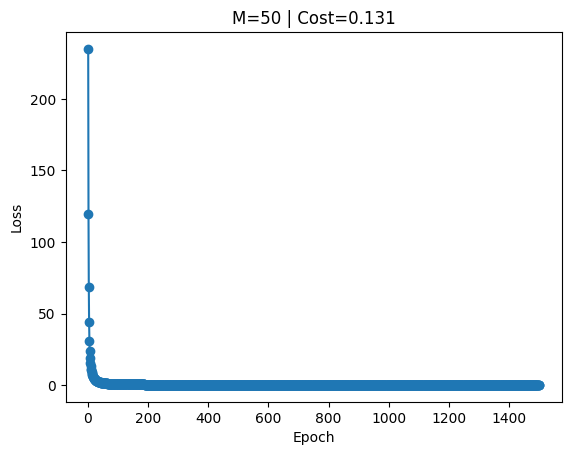

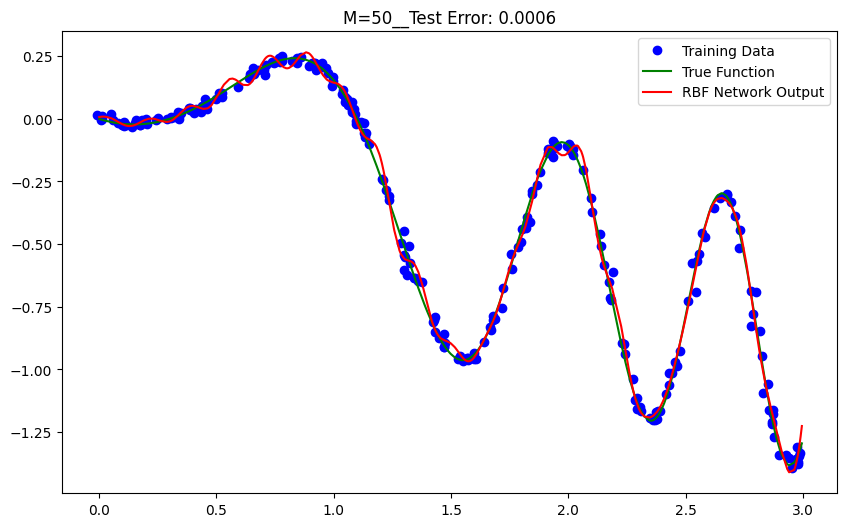

asdfasdf (250,)


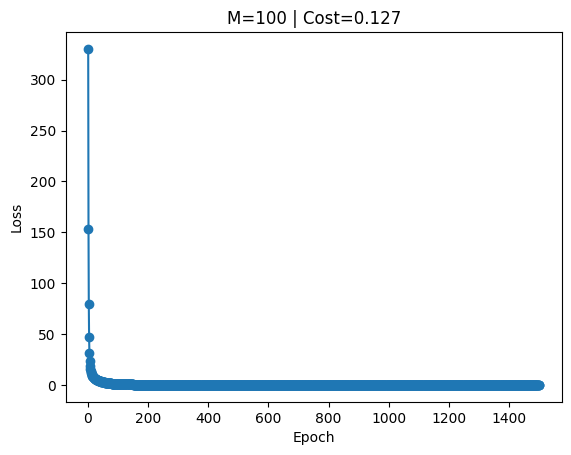

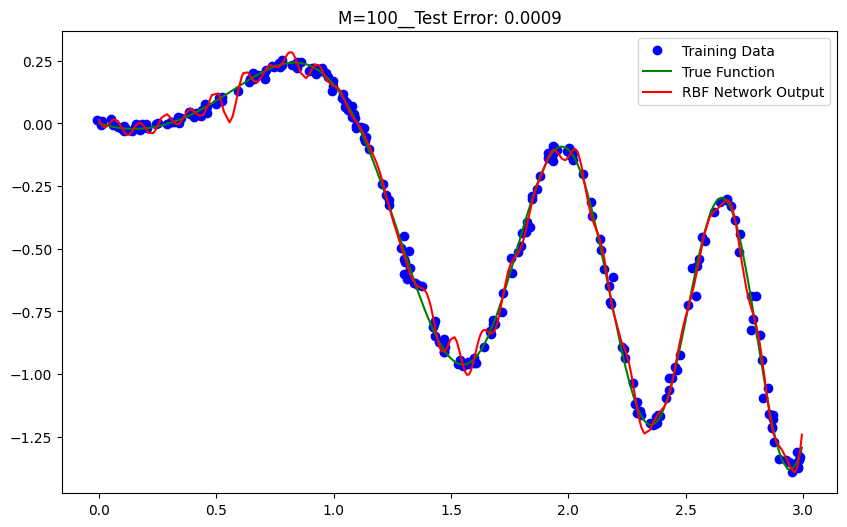

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import tkinter as tk

class RBF:
    # initialization
    def __init__(self, M, learning_rate=0.001, max_epoch=500, threshold=1e-3):
        self.M = M
        self.learning_rate = learning_rate
        self.max_epoch = max_epoch
        self.threshold = threshold
    
    # load file data
    def load_data(self, file_path):
        data = np.loadtxt(file_path) #(N,2)
        self.X_train = data[:, 0]  #(N,)
        self.y_train = data[:, 1]  #(N,)

    # load model parameters from files
    def load_params(self, M, folder_name):
        self.centers = np.loadtxt(f'./{folder_name}/rbfnet_c{M}.txt')
        self.W = np.loadtxt(f'./{folder_name}/rbfnet_w{M}.txt')
        self.maxd = max(self.centers) - min(self.centers)
        self.sigma2 = 0.05 * self.maxd**2 / (2 * self.M)
    
    def gaus(self, X, C):
        return np.exp(-((X[:, None] - C[None, :])**2) / (2 * self.sigma2))
    
    def train(self, file_path):
        self.load_data(file_path)
        self.centers = np.linspace(self.X_train.min(), self.X_train.max(), self.M)
        self.maxd = max(self.centers) - min(self.centers)
        self.sigma2 = 0.05 * self.maxd**2 / (2 * self.M)
        self.cost_ = []
        np.random.seed(42)
        self.W = np.random.randn(self.M)

        for epoch in range(self.max_epoch):
            phi = self.gaus(self.X_train, self.centers)
            y_pred = phi.dot(self.W)
            error = self.y_train - y_pred
            cost = (error**2).sum()/2  #損失関数は２乗損失
            self.cost_.append(cost)
            self.W += self.learning_rate * phi.T.dot(error)
            if cost < self.threshold:
                print(f'Converged at epoch {epoch}')
                break

        ##cost関数描画
        plt.plot(range(1, len(self.cost_) + 1), self.cost_, marker="o")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"M={self.M} | Cost={cost:.3f}")
        plt.show()

    def params_to_file(self, folder_name):
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        np.savetxt(f'./{folder_name}/rbfnet_c{self.M}.txt', self.centers)
        np.savetxt(f'./{folder_name}/rbfnet_w{self.M}.txt', self.W)

    def test_and_display(self, M, file_path, folder_name):
        self.load_data(file_path)
        self.load_params(M,folder_name)
        test_data = np.loadtxt("test.txt")
        sorted_test_data = test_data[test_data[:, 0].argsort()]

        X_test = sorted_test_data[:,0]
        y_true = sorted_test_data[:,1]

        phi = self.gaus(X_test, self.centers)
        y_pred = phi.dot(self.W)

        test_error = np.mean((y_true - y_pred)**2)
        plt.figure(figsize=(10, 6))
        plt.plot(self.X_train, self.y_train, 'bo', label='Training Data')
        plt.plot(X_test, y_true, color="g", label='True Function')
        plt.plot(X_test, y_pred, color='r', label='RBF Network Output')
        plt.title(f'M={M}__Test Error: {test_error:.4f}')
        plt.legend()
        plt.show()




class RBF_C(RBF):
    # def center_grad(self, X, C, phi, error):
    #     XC_dist = X - C # X(250,1, 2), C(1,10,2) --->>> (250,10,2)
    #     error_expanded = error[:,None,None] # (250,1,1)
    #     phi_expanded = phi[:,:,None] # (250,10,1)
    #     grad = np.sum(XC_dist*phi_expanded*error_expanded, axis=0)/self.sigma2
    #     return grad
    
    # def train_C(self, file_path):
    #     self.load_data(file_path)
    #     self.cost_ = []
    #     np.random.seed(42)
    #     self.centers = np.linspace(self.X_train.min(), self.X_train.max(), self.M)
    #     self.maxd = max(self.centers) - min(self.centers)
    #     self.sigma2 = 0.05 * self.maxd**2 / (2 * self.M)
    #     self.W = np.random.randn(self.M)

    #     for epoch in range(self.max_epoch):
    #         phi = self.gaus(self.X_train, self.centers)
    #         y_pred = phi.dot(self.W)
    #         error = self.y_train - y_pred
    #         cost = (error**2).sum() / 2  # 損失関数は２乗損失
    #         self.cost_.append(cost)
    #         self.W += self.learning_rate * phi.T.dot(error)

    #         # Update centers
    #         sigma_ = self.sigma(self.centers)
    #         gauss_gabibun = self.gauss_kake_gaussbibun(self.X_train, self.centers, sigma_)
    #         self.centers -= np.dot(gauss_gabibun, error) * self.W * self.learning_rate*0.01

    #         if cost < self.threshold:
    #             print(f'Converged at epoch {epoch}')
    #             break

    #     ##cost関数描画
    #     plt.plot(range(1, len(self.cost_) + 1), self.cost_, marker="o")
    #     plt.xlabel("Epoch")
    #     plt.ylabel("Loss")
    #     plt.title(f"M={self.M} | Cost={cost:.3f}")
    #     plt.show()
    def train(self, file_path):
        self.load_data(file_path)
        self.centers = np.linspace(self.X_train.min(), self.X_train.max(), self.M)
        self.maxd = max(self.centers) - min(self.centers)
        self.sigma2 = 0.05 * self.maxd**2 / (2 * self.M)
        self.cost_ = []
        np.random.seed(42)
        self.W = np.random.randn(self.M)

        for epoch in range(self.max_epoch):
            phi = self.gaus(self.X_train, self.centers) #(N, M)
            # dphi_dc = np.array([(feature - self.centers)/self.sigma2 for feature in self.X_train])  #(N, M)
            dphi_dc = np.linalg.norm(self.X_train[:,None] - self.centers[None,:], axis=1)/self.sigma2 #(N, M)

            y_pred = phi.dot(self.W)
            error = self.y_train - y_pred
            cost = (error**2).sum()/2  #損失関数は２乗損失
            self.cost_.append(cost)
            self.W += self.learning_rate * phi.T.dot(error)
            # c_grad = self.center_grad(self.X_train, self.centers, phi, error)
            # self.centers += self.eta * 0.001 * c_grad/ (2 * error.shape[0])

            self.centers += 0.001*self.learning_rate/self.X_train.shape[0] * np.dot(phi.T*self.W[:,None]*dphi_dc, error)
            if cost < self.threshold:
                print(f'Converged at epoch {epoch}')
                break
        print('asdfasdf',dphi_dc.shape)
        ##cost関数描画
        plt.plot(range(1, len(self.cost_) + 1), self.cost_, marker="o")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"M={self.M} | Cost={cost:.3f}")
        plt.show()

Mlist = [5, 10, 20, 30, 50, 100]
for m in Mlist:
    rbf = RBF_C(m, learning_rate, max_epoch, threshold)
    rbf.load_data(file_path)
    rbf.train(file_path)
    rbf.params_to_file(folder_name)
    rbf.test_and_display(m,file_path,folder_name)
